# Safe Absorbing States

Number of Omega-automaton states (including the trap state): 4


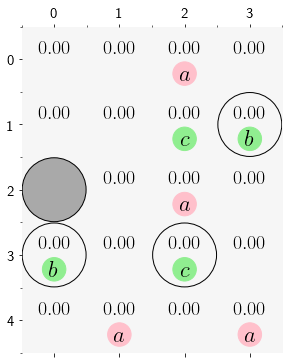

In [1]:
%matplotlib inline
from mdp import GridMDP
from oa import OmegaAutomaton
import numpy as np 
from csrl import ControlSynthesis

ltl = '(F G b | F G c) & G !a'
oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

shape = (5,4)
structure = np.array([
['E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'T',  'E'],
['B',  'E',  'E',  'E',  'E'],
['T',  'E',  'T',  'E',  'E'],
['E',  'E',  'E',  'E',  'E']
])
label = np.array([
[(),       (),     ('a',),()],
[(),       (),     ('c',),('b',)],
[(),       (),     ('a',),()],
[('b',),   (),     ('c',),()],
[(),       ('a',), (),    ('a',)]
],dtype=np.object)
lcmap={
    ('a',):'pink',
    ('b',):'lightgreen',
    ('c',):'lightgreen'
}
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,lcmap=lcmap)
grid_mdp.plot()

discount=0.9999
csrl = ControlSynthesis(grid_mdp,oa,discount)

In [2]:
Q=csrl.q_learning(T=200,K=500000)

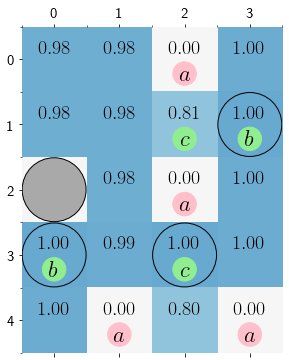

In [3]:
value=np.max(Q,axis=4)
csrl.plot(value,iq=(0,0),save='safe_absorbing_states_values.eps')

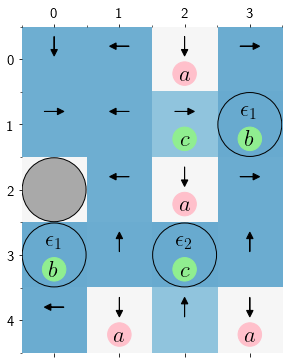

In [4]:
policy=np.argmax(Q,axis=4)
csrl.plot(value,policy,iq=(0,0),save='safe_absorbing_states_policy.eps')

In [5]:
episode=csrl.simulate(policy,start=(0,0),T=1000)

interactive(children=(IntSlider(value=0, description='t', max=999), Output()), _dom_classes=('widget-interact'…